
___
# Visualizing Titanic Dataset with Seaborn


## The Data

This script will explose the famous Titanic dataset using seaborn visualization. More info about the variables can be found here: https://www.kaggle.com/c/titanic/data

In [2]:
#Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#for viewing plots inline in jupyter notebook
%matplotlib inline   

In [3]:
#Set the grid backgrounds to white
sns.set_style('whitegrid')

In [4]:
#Load the dataset
titanic = sns.load_dataset('titanic')

In [5]:
#Check out the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Plotting the Data

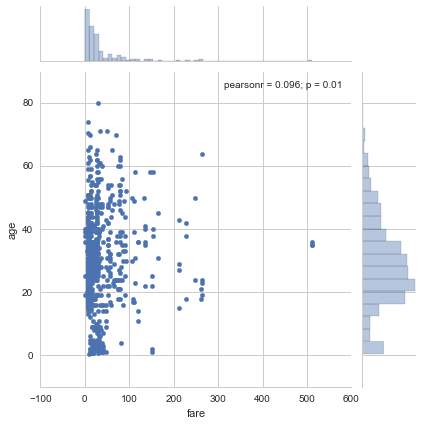

In [24]:
#Create a joint scatter plot of fare vs. age
sns.jointplot(x='fare', y='age', data=titanic,kind='scatter')

Histograms are shown in the axis for the corresponding axis variable. We will visualize these variables in different ways using seaborn. 

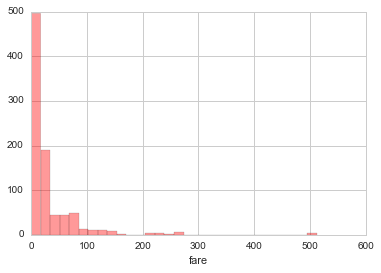

In [25]:
#Create a histogram (distplot) in seaborn. Set kde to false if we don't want the kde to appear on the plot
sns.distplot(titanic['fare'], kde=False, bins=30, color='red')

This histogram shows the distribution of fares skewed to the right. Let's see what we can learn about the passengers by looking at age and class, which is a proxy for socio-economic status:

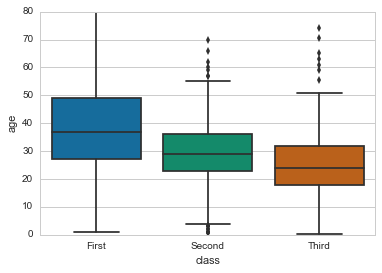

In [26]:
#Create a boxplot for class vs. age
sns.boxplot(x='class',y='age', data=titanic, palette='colorblind')

Now we can see that passengers in first class tended to be older. This makes sense if we think about younger people having accumulated less wealth.

To compliment the boxplot above, let's draw a swarmplot so we can see how all observations are distribution.

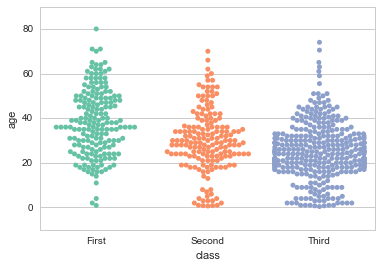

In [14]:
#Create a swarmplot
sns.swarmplot(x='class', y='age', data=titanic,palette='Set2')

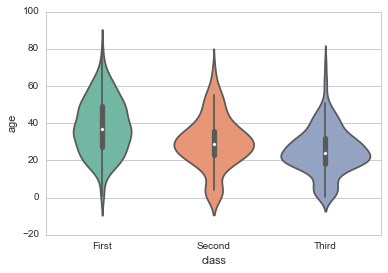

In [20]:
#Violin plot to show the general shape of distribution seen in the swarmplot
sns.violinplot(x="class", y="age", data=titanic,palette='Set2')

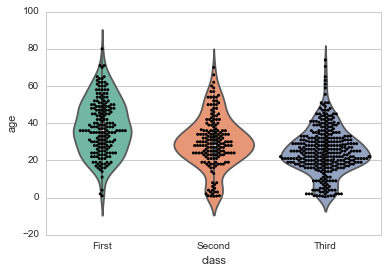

In [22]:
#Plotting a swarmplot on top of a violin plot:
sns.violinplot(x="class", y="age", data=titanic,palette='Set2')
sns.swarmplot(x="class", y="age", data=titanic,color='black',size=3)

Compare the two plots to see what kind of new information you can glean from a swarmplot when paired with a boxplot.

Let's visualize some categorical variables next.

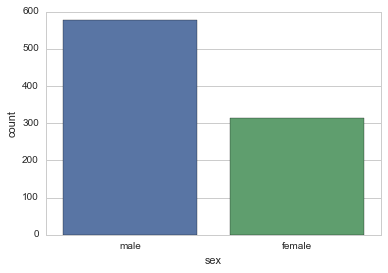

In [6]:
#Create a countplot for the sex category
sns.countplot(x='sex', data=titanic)

There were more male passengers than female passengers.

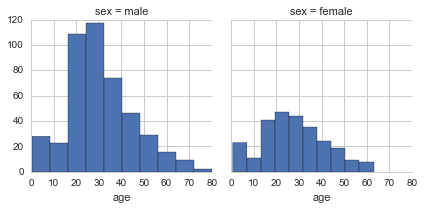

In [8]:
#Plot the distribution of age by gender using Seaborn's FacetGrid
g = sns.FacetGrid(titanic, col='sex')
g = g.map(plt.hist, 'age')

This demo shows how Seaborn's FacetGrid can be used to create separate distribution plots for a variable. In this case, we wanted to see how the age distribution looked like by gender.

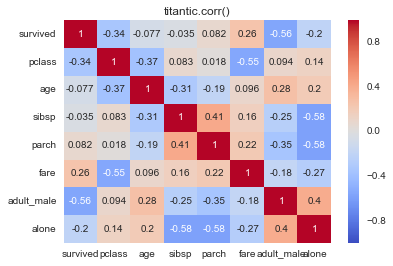

In [31]:
#Create a heatmap of the correlation between each numerical column.
sns.heatmap(titanic.corr(), cmap='coolwarm', annot=True)
plt.title('titantic.corr()')

By setting the annotation to true, the correlation coefficient will be printed in each cell value. This makes interpretation of the correlation matrix easier.

Not surprisingly, there is a negative correlation between a passenger traveling alone and the number of siblings/spouse or parents/children aboard. The matrix also shows a negative correlation the adult_male and survived variables. There is also a 0.4 positive correlation between the adult_male and alone variables, which is not surprising since some of the male passengers on the Titanic were traveling alone.